<a href="https://colab.research.google.com/github/kimayeon-hub/DeepLearning1/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 완전 연결층과 타이타닉 데이터

## Week4-2 타이타닉 데이터 전처리 한거 코드 실행시키기
- Week3-3 파일에서 타이타닉 데이터 업로드 시키기

In [ ]:
import pandas as pd

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [ ]:
data_train  # 위의 코드가 제대로 실행됐는지 확인하기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### train 데이터 전처리

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# 0으로 초기화 된 배열 생성
data_train_np = np.zeros([data_train.shape[0], 8])

# 성별 데이터 수치화
sex_num = np.zeros(data_train_np.shape[0])
sex_num[np.array(data_train['Sex'] == 'femaie')] = 1
data_train_np[:, 0:2] = to_categorical(sex_num)

# 티켓 등급 데이터 수치화
data_train_np[:, 2:5] = to_categorical(data_train['Pclass'].to_numpy() - 1)

# Age, SibSp, Parch 정규화
data_train_np[:, 5] = data_train['Age'] / 80
data_train_np[:, 6] = data_train['SibSp'] / 10
data_train_np[:, 7] = data_train['Parch'] / 10

# Age에 있는 결측치 평균값으로 대체하기
data_train_np[:, 5][np.isnan(data_train_np[:, 5])] = 30/80

# 생존자 데이터 one-hot-encoidng
data_train_np_y = to_categorical(data_train['Survived'])

### test 데이터 전처리

In [ ]:
# 0으로 초기화 된 배열 생성
data_test_np = np.zeros([data_test.shape[0], 8])

# 성별 데이터 수치화
sex_num = np.zeros(data_test_np.shape[0])
sex_num[data_test['Sex'] == 'female'] = 1
data_test_np[:, 0:2] = to_categorical(sex_num)

# 티켓 등급 데이터 수치화
data_test_np[:, 2:5] = to_categorical(data_test['Pclass'].to_numpy() - 1)

# Age, SibSp, Parch 정규화
data_test_np[:, 5] = data_test['Age'] / 80
data_test_np[:, 6] = data_test['SibSp'] / 10
data_test_np[:, 7] = data_test['Parch'] / 10

# Age에 있는 결측치 평균값으로 대체하기
data_test_np[:, 5][np.isnan(data_test_np[:, 5])] = 30/80

### 함수 형태로 만들기
- 데이터의 무결성을 방지하기 위해

In [ ]:
def preprocessing(df):
  # 0으로 초기화 된 numpy 배열 생성
  data_np = np.zeros([df.shape[0], 8])

  # 성별 데이터 수치화
  sex_num = np.zeros(data_np.shape[0])
  sex_num[df['Sex'] == 'female'] = 1
  data_np[:, 0:2] = to_categorical(sex_num)

  # 티켓 등급 데이터 수치화
  data_np[:, 2:5] = to_categorical(df['Pclass'].to_numpy() - 1)

  # Age, SibSp, Parch 정규화
  data_np[:, 5] = df['Age'] / 80
  data_np[:, 6] = df['SibSp'] / 10
  data_np[:, 7] = df['Parch'] / 10

  # Age에 있는 결측치 평균값으로 대체하기
  data_np[np.isnan(data_np)] = 30/80

  return data_np

In [ ]:
data_train_np = preprocessing(data_train)
data_test_np = preprocessing(data_test)

In [ ]:
# 생존자 데이터 one-hot-encoidng
data_train_np_y = to_categorical(data_train['Survived'])

In [ ]:
data_train_np  # 제대로 실행됐는지 확인

array([[1.   , 0.   , 0.   , ..., 0.275, 0.1  , 0.   ],
       [0.   , 1.   , 1.   , ..., 0.475, 0.1  , 0.   ],
       [0.   , 1.   , 0.   , ..., 0.325, 0.   , 0.   ],
       ...,
       [0.   , 1.   , 0.   , ..., 0.375, 0.1  , 0.2  ],
       [1.   , 0.   , 1.   , ..., 0.325, 0.   , 0.   ],
       [1.   , 0.   , 0.   , ..., 0.4  , 0.   , 0.   ]])

In [ ]:
data_test_np

array([[1.     , 0.     , 0.     , ..., 0.43125, 0.     , 0.     ],
       [0.     , 1.     , 0.     , ..., 0.5875 , 0.1    , 0.     ],
       [1.     , 0.     , 0.     , ..., 0.775  , 0.     , 0.     ],
       ...,
       [1.     , 0.     , 0.     , ..., 0.48125, 0.     , 0.     ],
       [1.     , 0.     , 0.     , ..., 0.375  , 0.     , 0.     ],
       [1.     , 0.     , 0.     , ..., 0.375  , 0.1    , 0.1    ]])

## 완전 연결층과 타이타닉 데이터를 사용해 딥러닝 돌리기

### 케라스 라이브러리 가져오기
- `keras`: tensorflow 라이브러리를 좀 더 쓰기 쉽게 만든 것

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import optimizers

### 딥러닝 네트워크 모델 설계
- `Sequential`: 한 방향으로 데이터가 흐르는 딥러닝의 기본 모델 구조를 구성
> 데이터의 흐름이 여러 갈래로 나누어지고 합쳐지는 복자반 구성도 가능함
- `모델.add()`: 네트워크에 층을 쌓는 함수
  - `layer.Dense()`: 완전 연결층을 의미
    - units: (입력) 노드의 수
    - activation: 활성화 함수

> 우리는 맨 처음 입력으로 8개가 들어옴 <br>
> 8개의 feature를 사용하기 때문


> 문제가 복잡해지는 것은 parameter가 많아지는 것

In [ ]:
model = Sequential()
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=2, activation='softmax'))

### 모델 컴파일
- `모델.compile()`
  - compile 함수는 손실함수, 최적화 도구 등 학습에 필요한 요소들을 설정하여 학습 모델을 구성함
  - `matrics=['accuracy']` 옵션: 학습 도중에 정확도의 변화를 확인하기 위한 것
- optimizer을 먼저하고 compile해야 함
- `optimizer`
  - 학습률의 설정은 optimizer 내부에서 지정함
  - 케라스에서 사용할 수 있는 optimizer
    - SGD
    - RMSProp
    - Adagrad
    - Adadelta
    - Adam
    - Adamax
    - Nadam
    - 등등

In [ ]:
optimizer=optimizers.Adam(learning_rate=0.002)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### 학습
- `모델.fit()`을 사용하여 학습을 수행할 수 있음
  - data_train_np: 학습 데이터의 입력
  - data_train_np_y: 학습 데이터의 출력
  - epochs: 에포크 수
  - batch_size: 배치 크기
  - validation_split: 학습 데이터 중 검증 데이터의 비율
    > 검증 데이터의 비율이 0보다 크면  <br>
    > fit 함수는 학습 데이터에서 랜덤하게 해당 비율 만큼의 데이터를 분리하여 검증용으로 사용함
- 학습이 진행되면서 *학습 시의 정확도*, *에포크별 검증 시의 정확도*가 계속해서 표시됨
- `fit 함수의 반환 값`: 학습 리포트

In [ ]:
hist = model.fit(data_train_np, data_train_np_y, epochs=300, batch_size=100, validation_split=0.3)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.6198 - loss: 0.6785 - val_accuracy: 0.6903 - val_loss: 0.6175
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7493 - loss: 0.6084 - val_accuracy: 0.7948 - val_loss: 0.5565
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7785 - loss: 0.5578 - val_accuracy: 0.7985 - val_loss: 0.4993
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7708 - loss: 0.5138 - val_accuracy: 0.7985 - val_loss: 0.4503
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7741 - loss: 0.4827 - val_accuracy: 0.8022 - val_loss: 0.4226
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7778 - loss: 0.4377 - val_accuracy: 0.8172 - val_loss: 0.4198
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8030 - loss: 0.4375 - val_accuracy: 0.8022 - val_loss: 0.4190
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8156 - loss: 0.4412 - val_accuracy: 0.8134 - val_loss:

### 그래프 그리기
- `drawHistory()`: 학습의 진행에 따른 손실값, 정확도의 변화량을 그래프로 나타내는 함수를 작성한 것
  - fit 함수에서 반환 받은 학습 리포트(hist 변수에 저장됨)를 파라미터로 받아 해당 내용을 그래프로 표시하는 일을 함
  - 하나의 그래프에 정확도와 손실값 모두를 나타내기 위해 `twinx 함수`를 사용하여 y축의 단위를 하나 더 추가함
- 학습 정확도: 파란색
- 검증정확도: 초록색

> 검증정확도가 어느 순간 떨어짐 (검증정확도와 학습 정확도가 역전됨) -> overfitting

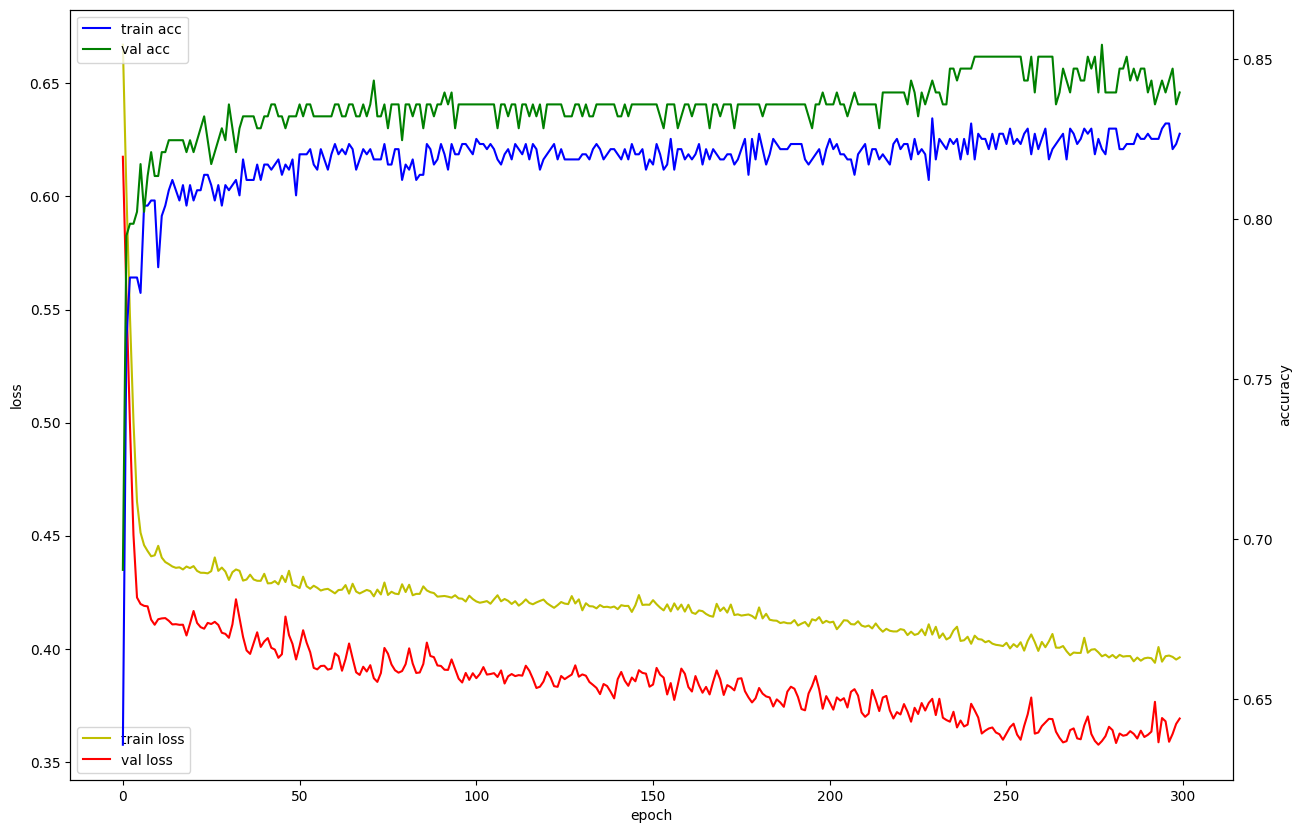

In [ ]:
import matplotlib.pyplot as plt

def drawHistory(hist):
  fig = plt.figure(figsize=(15,10))   # 10 X 15 크기의 figure 생성
  loss_ax = plt.gca()   # figure의 기본 축 가져오기
  acc_ax = loss_ax.twinx()    # 축을 1개 더 추가

  # 손실 변화 양상을 그래프로 표시
  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='lower left')

  # 정확도 변화 양상을 그래프로 표시
  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc='upper left')

  plt.show()    # 그래프를 화면에 그림

drawHistory(hist)   # 학습 경과를 그래프로 그리는 함수를 호출

### test 데이터를 모델에 넣어 테스트하기
- 학습이 완료되었다는 것은 model 변수 내부의 가중치 조정이 모두 완료되었다는 뜻

#### `predict 함수`
- 테스트 데이터를 파라미터로 받아, 해당 데이터에 대한 네트워크 출력을 반환값으로 돌려줌

In [ ]:
o = model.predict(data_test_np)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


#### 생존 여부를 0과 1로 나타내기
- 출력 노드는 두 개
- 둘 중 큰 값이 있는 노드가 승객의 생존 여부를 나타내게 됨


In [ ]:
o = np.argmax(o, -1)

#### 2차원 배열을 만들어 각각 저장하기
- 최종 제출 파일의 형식
  - 첫 번째 열: 승객ID (PassengerId)
  - 두 번째 열: 생존 여부 (Survived)

In [ ]:
answer = np.zeros([418, 2])
answer[:, 0] = data_test['PassengerId']
answer[:, 1] = o

#### 결과를 csv 파일로 저장하기

In [ ]:
# 배열 answer를 DataFrame 형식으로 변홚하고, df_frame 변수에 저장하기
df_answer =  pd.DataFrame(answer)
df_answer.columns = ['PassengerId', 'Survived']
df_answer = df_answer.astype('int32')

# 결과를 csv 파일로 저장하기 (index 제외하기)
df_answer.to_csv('test_pridict.csv', index = False)

## 과제
- epoch를 400에서 300으로 바꾸기
- learning rate를 0.001을 0.002로 바꾸기
- batch_size를 100으로 바꾸기

> 0.77511에서 0.78468로 정확도가 오름

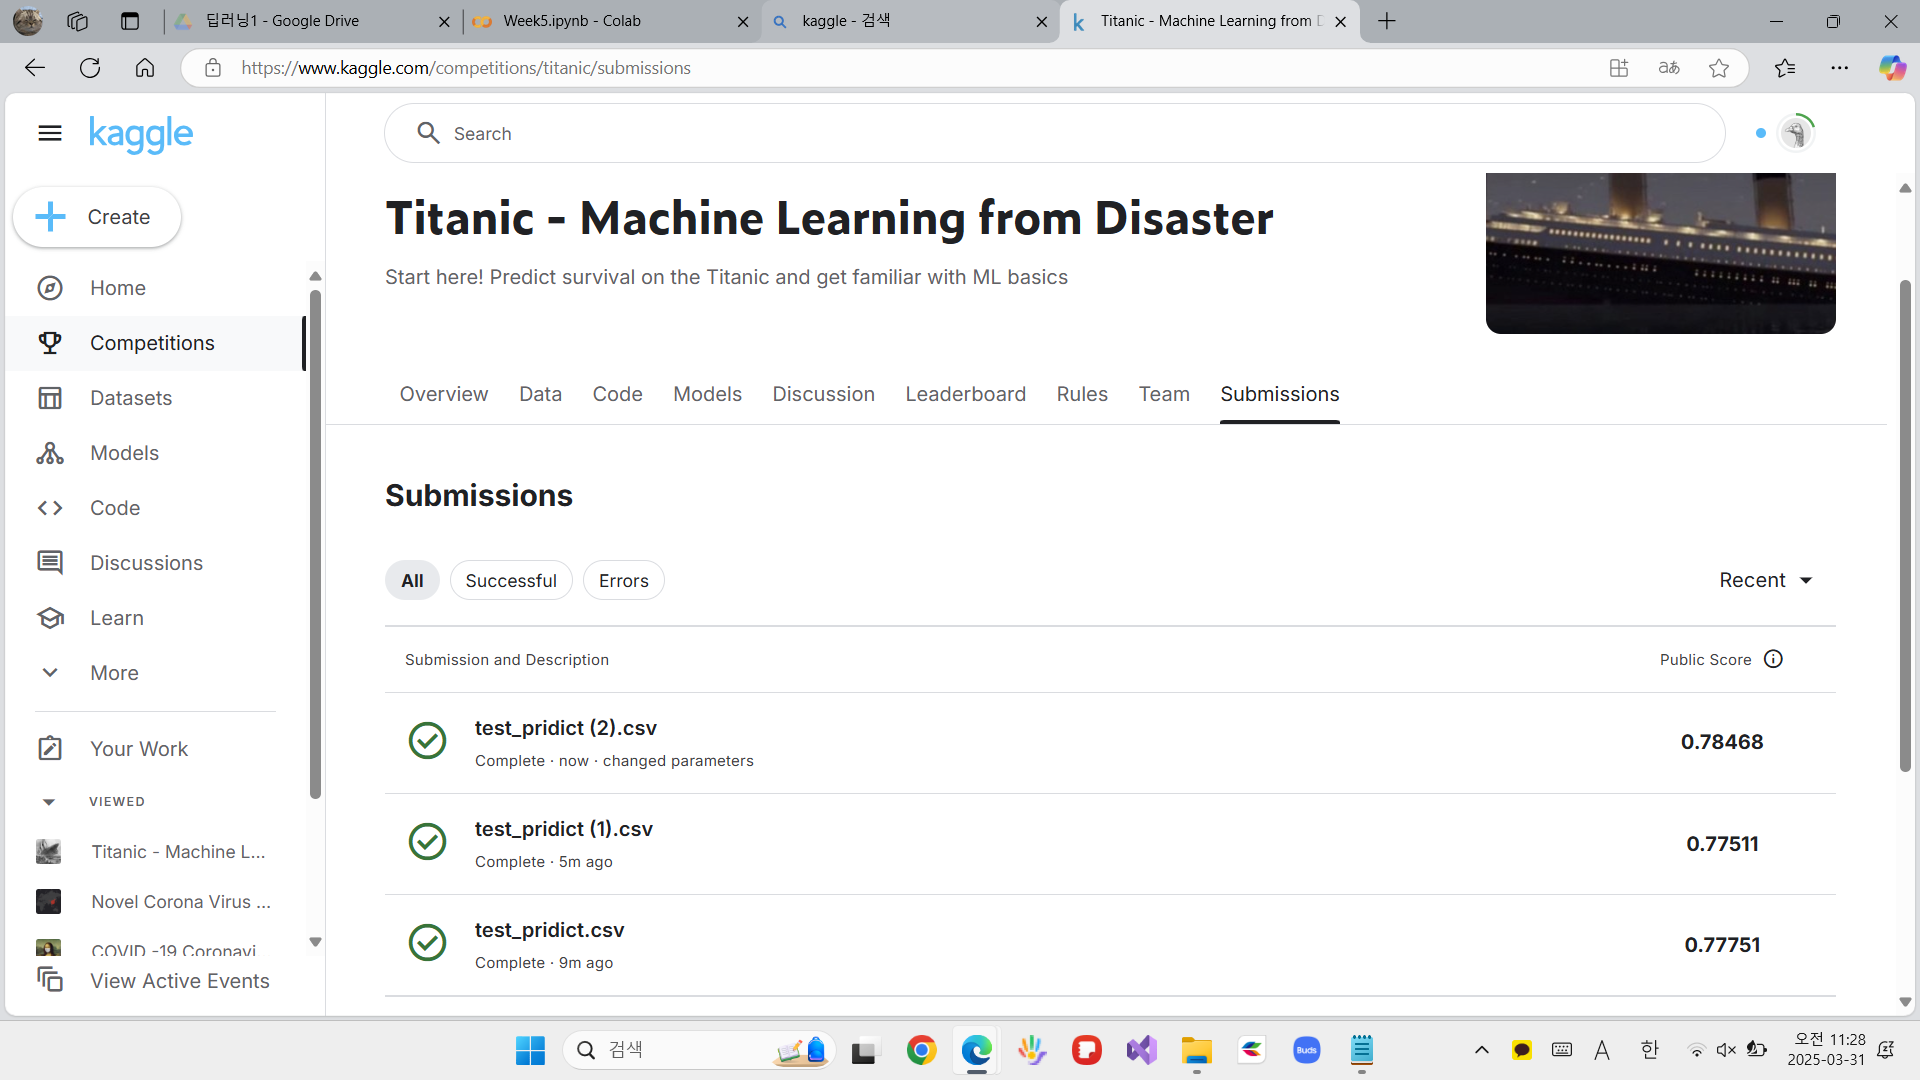